In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [3]:
dataset = pd.read_csv("Model 2.csv")

In [4]:
dataset.head(5)

,SSL(t-2),SSL(t-1),SSL(t)
0,0.5,1.1,0.7
1,1.1,0.7,0.4
2,0.7,0.4,0.5
3,0.4,0.5,1.2
4,0.5,1.2,1.9


In [5]:
# Split into features (X) and target (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
# Define the range of values for the number of trees
num_trees_range = range(10, 110, 10)

In [10]:
cv_scores = []

In [11]:
# Iterate over the range of values for the number of trees
for num_trees in num_trees_range:
    random_forest = RandomForestRegressor(n_estimators=num_trees)
    scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

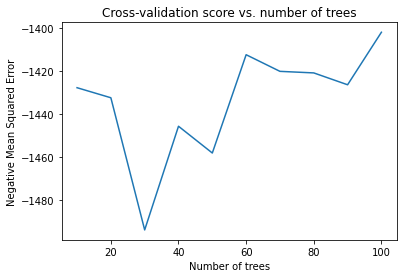

In [12]:
# Plot the cross-validation scores
plt.plot(num_trees_range, cv_scores)
plt.xlabel('Number of trees')
plt.ylabel('Negative Mean Squared Error')
plt.title('Cross-validation score vs. number of trees')
plt.show()

In [13]:
# Find the optimal value for the number of trees
optimal_num_trees = num_trees_range[np.argmax(cv_scores)]
print('Optimal number of trees:', optimal_num_trees)

Optimal number of trees: 100


In [14]:
# Train a final Random Forest model with the optimal number of trees
random_forest = RandomForestRegressor(n_estimators=optimal_num_trees)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
# Evaluate the performance of the model on a separate test set
y_pred = random_forest.predict(X_test)
test_score = mean_squared_error(y_test, y_pred)

print('Optimal number of trees:', optimal_num_trees)
print('Test score:', test_score)

Optimal number of trees: 100
Test score: 459.3261774711823


In [16]:
# Predict on the training and testing data
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)
# Calculate the training and testing error metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
nse_train = 1 - mean_squared_error(y_train, y_train_pred) / np.var(y_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
nse_test = 1 - mean_squared_error(y_test, y_test_pred) / np.var(y_test)
r2_test = r2_score(y_test, y_test_pred)

In [17]:
print("Random Forest Regressor:")
print("Train RMSE: {:.4f}".format(rmse_train))
print("Train NSE : {:.4f}".format(nse_train))
print("Train R^2 : {:.4f}".format(r2_train))
print("Test RMSE : {:.4f}".format(rmse_test))
print("Test NSE  : {:.4f}".format(nse_test))
print("Test R^2  : {:.4f}".format(r2_test))


Random Forest Regressor:
Train RMSE: 16.5557
Train NSE : 0.7914
Train R^2 : 0.7914
Test RMSE : 21.4319
Test NSE  : -0.2095
Test R^2  : -0.2095


In [18]:
pd.DataFrame(y_train).to_csv('/content/actualTrain.csv', index=False, header=False)
pd.DataFrame(y_train_pred).to_csv('/content/predictTrain.csv', index=False, header=False)
pd.DataFrame(y_test).to_csv('/content/actualTest.csv', index=False, header=False)
pd.DataFrame(y_test_pred).to_csv('/content/predictTest.csv', index=False, header=False)